In [1]:
import pandas as pd
import pandasql as sql
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


What’s the probability that...

- a movie was longer than an hour and a half? Two hours?
- a movie was directed by Stephen Spielberg?
- a movie directed by Clint Eastwood will gross under budget?
- a movie generally grossed more than its budget?
- a movie grossed over the average gross of this data set?

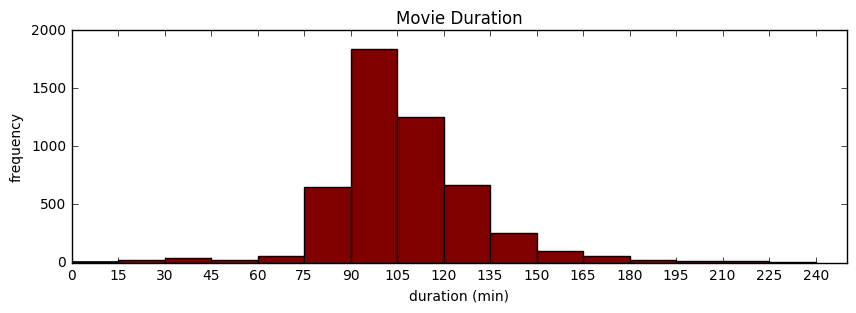

In [4]:
plt.figure(figsize=(10, 3))
plt.hist(data.duration.dropna(), bins=np.arange(0, 250, 15), color='maroon')
plt.xlabel('duration (min)')
plt.ylabel('frequency')
plt.xticks(np.arange(0, 255, 15))
plt.title('Movie Duration')
plt.show()

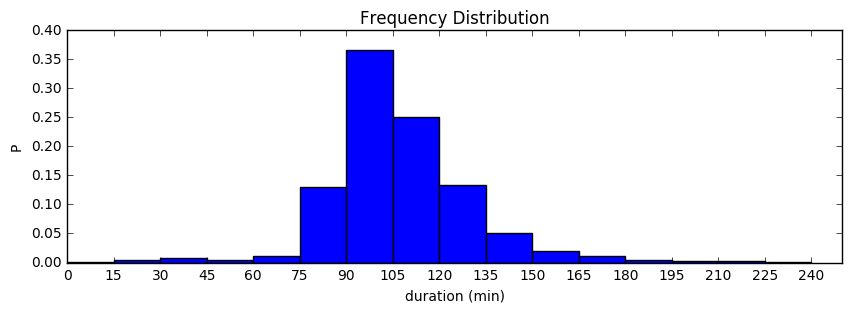

In [5]:
# frequency distribution
plt.figure(figsize=(10, 3))
heights, edges = np.histogram(data.duration.dropna(), bins=np.arange(0, 250, 15))
probs = heights / sum(heights)
plt.bar(edges[:-1], probs, width=edges[1] - edges[0])
plt.xticks(np.arange(0, 255, edges[1] - edges[0]))
plt.xlabel('duration (min)')
plt.ylabel('P')
plt.title('Frequency Distribution')
plt.show()

In [6]:
num_movies = sql.sqldf('SELECT movie_title FROM data').count().movie_title

In [7]:
# probability a movie was longer than 90 min.
(sql.sqldf('SELECT movie_title FROM data WHERE duration > 90.0').count() / num_movies).movie_title

0.80805076343446358

In [8]:
# probability a movie was longer than 120 min.
(sql.sqldf('SELECT movie_title FROM data WHERE duration > 120.0').count() / num_movies).movie_title

0.21158040848701171

In [9]:
# probability a movie was made by Steven Spielberg
tot_spielbergs = sql.sqldf('SELECT movie_title FROM data WHERE director_name == "Steven Spielberg"').count().movie_title
tot_spielbergs / num_movies

0.0051556613127106878

In [10]:
# probability a movie directed by Clint Eastwood will gross under budget
num_clints_gross_low = sql.sqldf('SELECT movie_title FROM data WHERE director_name == "Clint Eastwood" AND gross < budget').count().movie_title
num_clints_gross_low / sql.sqldf('SELECT movie_title from data WHERE director_name == "Clint Eastwood"').count().movie_title

0.34999999999999998

movie budgets

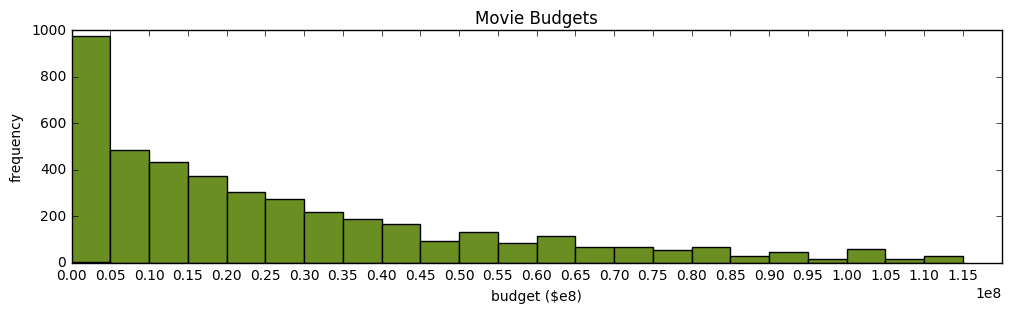

In [57]:
plt.figure(figsize=(12, 3))
plt.hist(data.budget.dropna(), color='olivedrab', bins=np.arange(0, 120000000, 5000000))
plt.xlabel('budget ($e8)')
plt.ylabel('frequency')
plt.xticks(np.arange(0, 120000000, 5000000))
plt.title('Movie Budgets')
plt.show()

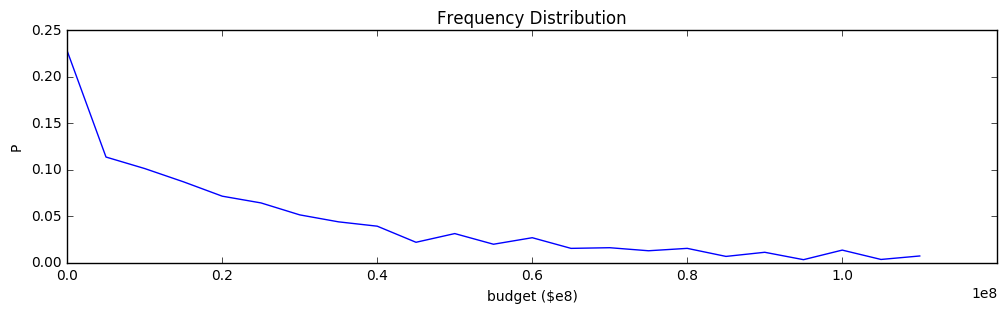

In [68]:
# frequency distribution
plt.figure(figsize=(12, 3))
heights, edges = np.histogram(data.budget.dropna(), bins=np.arange(0, 120000000, 5000000))
probs = heights / sum(heights)
# plt.bar(edges[:-1], probs, width=edges[1] - edges[0])
plt.plot(edges[:-1], probs)
plt.xticks(np.arange(0, 120000000, (edges[1] - edges[0])*4))
plt.xlabel('budget ($e8)')
plt.ylabel('P')
plt.title('Frequency Distribution')
plt.show()

In [54]:
# probability that a movie generally grossed more than its budget
sql.sqldf('SELECT movie_title FROM data WHERE gross > budget').count().movie_title / num_movies

0.4065040650406504

In [ ]:
# probability that a movie grossed over the average gross of this data set
avg = float((sql.sqldf('SELECT SUM(gross) from data') / num_movies).loc[0])
movies_above = sql.sqldf('SELECT movie_title from data WHERE gross > ' + str(avg)).count().movie_title
movies_above / num_movies

# time for pollution data

In [ ]:
data = pd.read_csv('pollution_us_2000_2016.csv')
data

What’s the probability that...

- there was a day when a city on the East coast produced a higher average volume of CO than the national average?
- during 2001 a city’s average Air Quality Index (AQI) for CO went over the “Unhealthy” limit? How about for O3? SO2?

In [ ]:
data.columns

In [ ]:
set(data.City)

### East coast cities will just be: Boston, New York, Philadelphia, Charlotte, Raleigh, 